In [3]:
%load_ext rpy2.ipython

%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")

%config InlineBackend.figure_format = 'retina'

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [7]:
%%R -i flights

library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   31

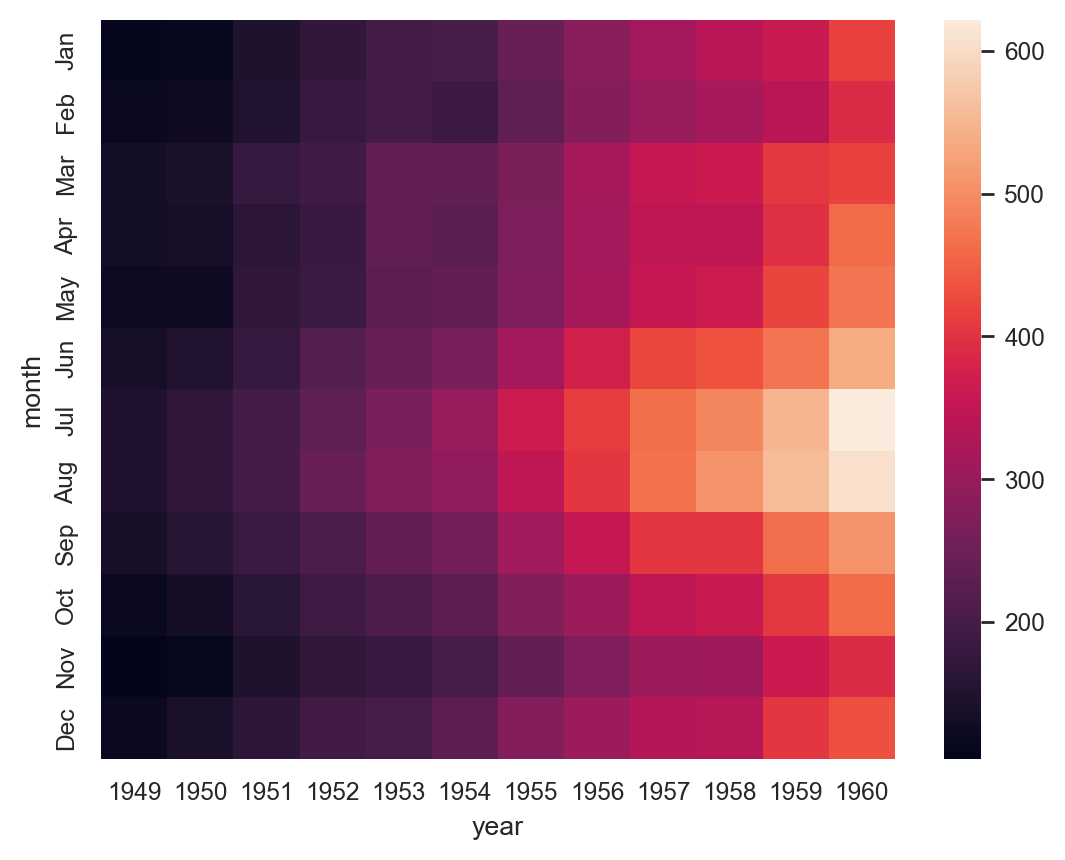

In [4]:
flights = sns.load_dataset("flights")
flights = flights.pivot(index="month", columns="year", values="passengers")
print(flights)
ax = sns.heatmap(flights)

In [13]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [27]:
%%R -i penguins

penguins %>% gather(variable, value, bill_length_mm:sex) %>% head()

  species    island       variable value
1  Adelie Torgersen bill_length_mm  39.1
2  Adelie Torgersen bill_length_mm  39.5
3  Adelie Torgersen bill_length_mm  40.3
4  Adelie Torgersen bill_length_mm   NaN
5  Adelie Torgersen bill_length_mm  36.7
6  Adelie Torgersen bill_length_mm  39.3


In [28]:
%%R -i penguins

penguins %>% gather(variable, value, body_mass_g:sex) %>% head()

  species    island bill_length_mm bill_depth_mm flipper_length_mm    variable
1  Adelie Torgersen           39.1          18.7               181 body_mass_g
2  Adelie Torgersen           39.5          17.4               186 body_mass_g
3  Adelie Torgersen           40.3          18.0               195 body_mass_g
4  Adelie Torgersen            NaN           NaN               NaN body_mass_g
5  Adelie Torgersen           36.7          19.3               193 body_mass_g
6  Adelie Torgersen           39.3          20.6               190 body_mass_g
  value
1  3750
2  3800
3  3250
4   NaN
5  3450
6  3650


In [29]:
%%R -i penguins

penguins %>% select(species, island, bill_length_mm, sex) %>% gather(measure, value, bill_length_mm:sex) %>% head()

  species    island        measure value
1  Adelie Torgersen bill_length_mm  39.1
2  Adelie Torgersen bill_length_mm  39.5
3  Adelie Torgersen bill_length_mm  40.3
4  Adelie Torgersen bill_length_mm   NaN
5  Adelie Torgersen bill_length_mm  36.7
6  Adelie Torgersen bill_length_mm  39.3


In [30]:
(penguins[['species', 'island', 'bill_length_mm', 'sex']]
 .melt(id_vars=['species', 'island'])
)

,species,island,variable,value
0,Adelie,Torgersen,bill_length_mm,39.1
1,Adelie,Torgersen,bill_length_mm,39.5
2,Adelie,Torgersen,bill_length_mm,40.3
3,Adelie,Torgersen,bill_length_mm,NaN
4,Adelie,Torgersen,bill_length_mm,36.7
...,...,...,...,...
683,Gentoo,Biscoe,sex,NaN
684,Gentoo,Biscoe,sex,Female
685,Gentoo,Biscoe,sex,Male
686,Gentoo,Biscoe,sex,Female


In [34]:
(penguins
 .melt(id_vars=['species', 'island'],
       value_vars=['bill_length_mm', 'sex'])
)

,species,island,variable,value
0,Adelie,Torgersen,bill_length_mm,39.1
1,Adelie,Torgersen,bill_length_mm,39.5
2,Adelie,Torgersen,bill_length_mm,40.3
3,Adelie,Torgersen,bill_length_mm,NaN
4,Adelie,Torgersen,bill_length_mm,36.7
...,...,...,...,...
683,Gentoo,Biscoe,sex,NaN
684,Gentoo,Biscoe,sex,Female
685,Gentoo,Biscoe,sex,Male
686,Gentoo,Biscoe,sex,Female


In [33]:
(penguins[['species', 'island', 'bill_length_mm', 'sex']]
 .melt(id_vars=['species', 'island'],
       value_vars=['bill_length_mm', 'sex'])
)

,species,island,variable,value
0,Adelie,Torgersen,bill_length_mm,39.1
1,Adelie,Torgersen,bill_length_mm,39.5
2,Adelie,Torgersen,bill_length_mm,40.3
3,Adelie,Torgersen,bill_length_mm,NaN
4,Adelie,Torgersen,bill_length_mm,36.7
...,...,...,...,...
683,Gentoo,Biscoe,sex,NaN
684,Gentoo,Biscoe,sex,Female
685,Gentoo,Biscoe,sex,Male
686,Gentoo,Biscoe,sex,Female


In [25]:
(penguins
 .melt(id_vars=['species', 'island'])
)

,species,island,variable,value
0,Adelie,Torgersen,bill_length_mm,39.1
1,Adelie,Torgersen,bill_length_mm,39.5
2,Adelie,Torgersen,bill_length_mm,40.3
3,Adelie,Torgersen,bill_length_mm,NaN
4,Adelie,Torgersen,bill_length_mm,36.7
...,...,...,...,...
683,Gentoo,Biscoe,sex,NaN
684,Gentoo,Biscoe,sex,Female
685,Gentoo,Biscoe,sex,Male
686,Gentoo,Biscoe,sex,Female


In [21]:
(penguins[['species', 'island', 'bill_length_mm', 'sex']]
 .melt(id_vars=['species', 'island'], var_name='measure', value_name='value')
                                                 )


,species,island,measure,value
0,Adelie,Torgersen,bill_length_mm,39.1
1,Adelie,Torgersen,bill_length_mm,39.5
2,Adelie,Torgersen,bill_length_mm,40.3
3,Adelie,Torgersen,bill_length_mm,NaN
4,Adelie,Torgersen,bill_length_mm,36.7
...,...,...,...,...
683,Gentoo,Biscoe,sex,NaN
684,Gentoo,Biscoe,sex,Female
685,Gentoo,Biscoe,sex,Male
686,Gentoo,Biscoe,sex,Female


In [18]:
penguins[['species', 'island', 'bill_length_mm', 'sex']].melt(id_vars=['species', 'island'])

,species,island,variable,value
0,Adelie,Torgersen,bill_length_mm,39.1
1,Adelie,Torgersen,bill_length_mm,39.5
2,Adelie,Torgersen,bill_length_mm,40.3
3,Adelie,Torgersen,bill_length_mm,NaN
4,Adelie,Torgersen,bill_length_mm,36.7
...,...,...,...,...
683,Gentoo,Biscoe,sex,NaN
684,Gentoo,Biscoe,sex,Female
685,Gentoo,Biscoe,sex,Male
686,Gentoo,Biscoe,sex,Female


In [57]:
penguins.melt(['species', 'island'], ['bill_length_mm', 'sex'], 'feature', 'measurement')

,species,island,feature,measurement
0,Adelie,Torgersen,bill_length_mm,39.1
1,Adelie,Torgersen,bill_length_mm,39.5
2,Adelie,Torgersen,bill_length_mm,40.3
3,Adelie,Torgersen,bill_length_mm,NaN
4,Adelie,Torgersen,bill_length_mm,36.7
...,...,...,...,...
683,Gentoo,Biscoe,sex,NaN
684,Gentoo,Biscoe,sex,Female
685,Gentoo,Biscoe,sex,Male
686,Gentoo,Biscoe,sex,Female


In [88]:
df = penguins.melt()
df

,variable,value
0,species,Adelie
1,species,Adelie
2,species,Adelie
3,species,Adelie
4,species,Adelie
...,...,...
2403,sex,NaN
2404,sex,Female
2405,sex,Male
2406,sex,Female


In [97]:
df.stack().unstack()

,variable,value
0,species,Adelie
1,species,Adelie
2,species,Adelie
3,species,Adelie
4,species,Adelie
...,...,...
2403,sex,NaN
2404,sex,Female
2405,sex,Male
2406,sex,Female


In [89]:
df.pivot(columns='variable', values='value')

variable,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm,island,sex,species
0,NaN,NaN,NaN,NaN,NaN,NaN,Adelie
1,NaN,NaN,NaN,NaN,NaN,NaN,Adelie
2,NaN,NaN,NaN,NaN,NaN,NaN,Adelie
3,NaN,NaN,NaN,NaN,NaN,NaN,Adelie
4,NaN,NaN,NaN,NaN,NaN,NaN,Adelie
...,...,...,...,...,...,...,...
2403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2404,NaN,NaN,NaN,NaN,NaN,Female,NaN
2405,NaN,NaN,NaN,NaN,NaN,Male,NaN
2406,NaN,NaN,NaN,NaN,NaN,Female,NaN


In [90]:
pd.wide_to_long(df, ["variable", "B"], i="id", j="year")

TypeError: wide_to_long() missing 3 required positional arguments: 'stubnames', 'i', and 'j'

In [36]:
penguins.stack()

0    species                 Adelie
     island               Torgersen
     bill_length_mm            39.1
     bill_depth_mm             18.7
     flipper_length_mm        181.0
                            ...    
343  bill_length_mm            49.9
     bill_depth_mm             16.1
     flipper_length_mm        213.0
     body_mass_g             5400.0
     sex                       Male
Length: 2389, dtype: object

In [16]:
%%R -i penguins

penguins %>% gather(measure, value, c(bill_length_mm, sex)) %>% head()

  species    island bill_depth_mm flipper_length_mm body_mass_g        measure
1  Adelie Torgersen          18.7               181        3750 bill_length_mm
2  Adelie Torgersen          17.4               186        3800 bill_length_mm
3  Adelie Torgersen          18.0               195        3250 bill_length_mm
4  Adelie Torgersen           NaN               NaN         NaN bill_length_mm
5  Adelie Torgersen          19.3               193        3450 bill_length_mm
6  Adelie Torgersen          20.6               190        3650 bill_length_mm
  value
1  39.1
2  39.5
3  40.3
4   NaN
5  36.7
6  39.3


In [11]:
%%R

head(flights)

    1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
Jan  112  115  145  171  196  204  242  284  315  340  360  417
Feb  118  126  150  180  196  188  233  277  301  318  342  391
Mar  132  141  178  193  236  235  267  317  356  362  406  419
Apr  129  135  163  181  235  227  269  313  348  348  396  461
May  121  125  172  183  229  234  270  318  355  363  420  472
Jun  135  149  178  218  243  264  315  374  422  435  472  535


In [12]:
%%R

flights %>% gather(1949,value,Y1993:FY1998)

Error in `ensym()`:
! Can't convert to a symbol.
Run `rlang::last_trace()` to see where the error occurred.

Fejl i ensym(key) :


RInterpreterError: Failed to parse and evaluate line '\nflights %>% gather(1949,value)\n'.
R error message: 'Fejl i ensym(key) :'

# melt == gather

In [55]:
df = pd.DataFrame({'chrom':['chr1']*2+['chr2']*2, 'pos':list(range(2))+list(range(2)), 'A':range(4), 'B':range(4)})
print(df)
# high = pd.melt(df, id_vars=['chrom', 'pos'])
# print(high)
high = pd.melt(df, id_vars=['chrom', 'pos'], value_vars=['A', 'B'], 
               var_name='population', value_name='measurement')
print(high)

   A  B chrom  pos
0  0  0  chr1    0
1  1  1  chr1    1
2  2  2  chr2    0
3  3  3  chr2    1
  chrom  pos population  measurement
0  chr1    0          A            0
1  chr1    1          A            1
2  chr2    0          A            2
3  chr2    1          A            3
4  chr1    0          B            0
5  chr1    1          B            1
6  chr2    0          B            2
7  chr2    1          B            3


AttributeError: 'DataFrame' object has no attribute 'melt'

# pivot_table == spread

In [3]:
print(pd.pivot_table(high,index=["chrom","pos"], 
                     columns=['population'], 
                     values=['measurement']))


           measurement   
population           A  B
chrom pos                
chr1  0              0  0
      1              1  1
chr2  0              2  2
      1              3  3


# assign == mutate

In [4]:
print(high.assign(log_measurement = lambda x: np.log(x.measurement)))

  chrom  pos population  measurement  log_measurement
0  chr1    0          A            0             -inf
1  chr1    1          A            1         0.000000
2  chr2    0          A            2         0.693147
3  chr2    1          A            3         1.098612
4  chr1    0          B            0             -inf
5  chr1    1          B            1         0.000000
6  chr2    0          B            2         0.693147
7  chr2    1          B            3         1.098612


/Users/kasper/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


# aggregate == summarize

In [5]:
def length(df):
    return len(df.index)
    
result = (high[['chrom', 'population', 'measurement']]
      .groupby(['chrom', 'population'])
      .aggregate([np.mean, np.var, length])
     )
print(result)

                 measurement            
                        mean  var length
chrom population                        
chr1  A                  0.5  0.5      2
      B                  0.5  0.5      2
chr2  A                  2.5  0.5      2
      B                  2.5  0.5      2


# key access == select

In [6]:
cols = ['chrom', 'pos']
print(high[cols])

  chrom  pos
0  chr1    0
1  chr1    1
2  chr2    0
3  chr2    1
4  chr1    0
5  chr1    1
6  chr2    0
7  chr2    1


# .loc == filter and access rows

In [7]:
print(high.loc[1:3]) # slice
print(high.loc[range(2)]) # generator
print(high.loc[ high['chrom'] == 'chr1' ])

  chrom  pos population  measurement
1  chr1    1          A            1
2  chr2    0          A            2
3  chr2    1          A            3
  chrom  pos population  measurement
0  chr1    0          A            0
1  chr1    1          A            1
  chrom  pos population  measurement
0  chr1    0          A            0
1  chr1    1          A            1
4  chr1    0          B            0
5  chr1    1          B            1


In [8]:
stats = (pd.melt(df, 
                 id_vars=['chrom', 'pos'], 
                 value_vars=['A', 'B'], 
                 var_name='population', value_name='measurement')
# .loc[lambda x: x.measurement >= 1]           # filter rows on the fly
 .get(['chrom', 'population', 'measurement']) # filter cols on the fly
 .groupby(['chrom', 'population'])
 .aggregate([np.mean, np.var, length])
)

print(stats)
print(stats.reset_index())

def flatten_column_multi_index(df):
    df.columns = ['_'.join(col).strip() for col in df.columns.values]

flatten_column_multi_index(stats)
print(stats)
print(stats.reset_index())

                 measurement            
                        mean  var length
chrom population                        
chr1  A                  0.5  0.5      2
      B                  0.5  0.5      2
chr2  A                  2.5  0.5      2
      B                  2.5  0.5      2
  chrom population measurement            
                          mean  var length
0  chr1          A         0.5  0.5      2
1  chr1          B         0.5  0.5      2
2  chr2          A         2.5  0.5      2
3  chr2          B         2.5  0.5      2
                  measurement_mean  measurement_var  measurement_length
chrom population                                                       
chr1  A                        0.5              0.5                   2
      B                        0.5              0.5                   2
chr2  A                        2.5              0.5                   2
      B                        2.5              0.5                   2
  chrom population  mea

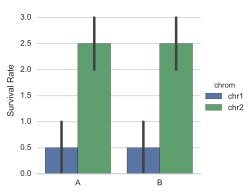

In [50]:
g = sns.factorplot(data=high.reset_index(), 
               x='population', 
               y='measurement', 
#               col='chrom', 
#               row='population',
               hue='chrom',
               kind='bar',
               size=3, 
               aspect=1)

(g.set_axis_labels("", "Survival Rate")
#    .set_xticklabels(["Men", "Wo"])
#    .set_titles("{col_name} in {row_var} {row_name}")
    .set(ylim=(0, 3.2))
    .despine(left=True))  

plt.show()